<br>
<u>Notebook Five</u> | 
<a href=https://leone.gdn/NLP target=_blank>Report</a> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Linear Models</b><br><br>
Andrea Leone<br>
ML for NLP — University of Trento<br>
January 2022
<hr><br><br>

In [1]:
import project 

import sklearn
import sklearn.linear_model
import sklearn.discriminant_analysis

project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
""")

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

train_set  =>  (0, 1376) (1, 1572) (2, 1052) 
test_set   =>  (0,  243) (1,  275) (2,  192) 


<br/>

### Logistic Regression

In [3]:
lr  = sklearn.linear_model.LogisticRegression( 
    multi_class='multinomial', penalty='none', solver='lbfgs',
    max_iter=400, tol=1e-2, fit_intercept=False, C=2,
    class_weight=project.class_weights(y)
).fit(x,y)

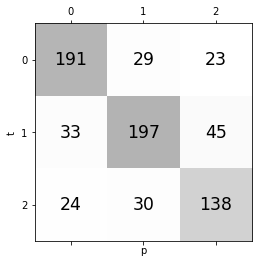

accuracy    0.7408450704225352
precision   0.7365318176479799
recall      0.7403739556054371


In [4]:
p = lr.predict(z) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — LogReg<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .74084507 .73653181 .74037395  191 197 138
en_core_web_lg   .72222222 .71888288 .71893784  178 160 117  without outliers (pm=LOF)
en_core_web_lg   .71491228 .70398010 .70486052  109 147  70  without outliers (pm=IF)

en_core_web_trf  .69252468 .68450750 .68533017  194 181 116
en_core_web_trf  .68456375 .67196153 .67399599  136 183  89  without outliers (pm=LOF)
en_core_web_trf  .68633540 .67653301 .68215485   78  94  49  without outliers (pm=IF)

</pre>

<br/>

### Ridge Classifier

In [5]:
rc  = sklearn.linear_model.RidgeClassifier( 
    alpha=0.1, solver='svd',
    fit_intercept=True, normalize=True,
    class_weight=project.class_weights(y)
).fit(x,y)

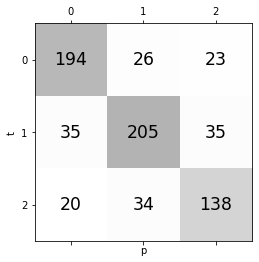

accuracy    0.7563380281690141
precision   0.7522610013922973
recall      0.7541861516398555


In [6]:
p   = rc.predict(z) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — RidgeC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .75633802 .75226100 .75418615  194 205 138
en_core_web_lg   .75555555 .75225453 .75092338  188 168 120  without outliers (pm=LOF)
en_core_web_lg   .72807017 .71534510 .71784028  112 149  71  without outliers (pm=IF)

en_core_web_trf  .71509167 .70614073 .70450331  201 194 112
en_core_web_trf  .71476510 .70155909 .70322505  143 191  92  without outliers (pm=LOF)
en_core_web_trf  .70807453 .69512366 .69981149   79 100  49  without outliers (pm=IF)

</pre>

<br/>

### Stochastic Gradient Descent Classifier

In [7]:
sgd = sklearn.linear_model.SGDClassifier( 
    alpha=0.0001, epsilon=0.2, random_state=6,
    max_iter=400, tol=1e-2, fit_intercept=True,
    eta0=0.001, learning_rate='optimal',
    class_weight=project.class_weights(y)
).fit(x,y)

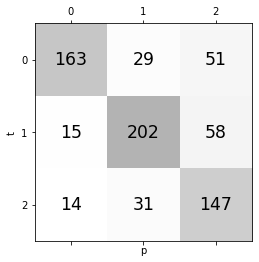

accuracy    0.7211267605633803
precision   0.731389816581849
recall      0.7236507825165233


In [8]:
p = sgd.predict(z) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — SGDC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .72112676 .73138981 .72365078  163 202 147
en_core_web_lg   .74603174 .74869077 .74665849  107 158  75  without outliers (pm=LOF)
en_core_web_lg   .74561403 .73889044 .73516162  107 158  75  without outliers (pm=IF)

en_core_web_trf  .60930888 .68816913 .58104511  258 101  73
en_core_web_trf  .68288590 .68164749 .64248209  131 217  59  without outliers (pm=LOF)
en_core_web_trf  .44720496 .68762062 .50073867   25  50  69  without outliers (pm=IF)

</pre>

<br/>

### Linear Discriminant Analysis

In [9]:
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(tol=0.02).fit(x,y)

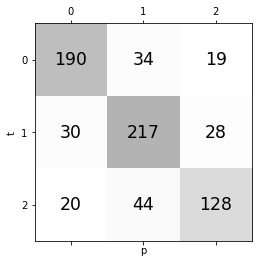

accuracy    0.7535211267605634
precision   0.752896152811407
recall      0.7458835266242674


In [10]:
p = lda.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — LDA<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .75352112 .75289615 .74588352  190 217 128
en_core_web_lg   .75079365 .74532877 .74161310  189 174 110  without outliers (pm=LOF)
en_core_web_lg   .72807017 .71543569 .71212844  115 151  66  without outliers (pm=IF)

en_core_web_trf  .69675599 .68740503 .68518299  196 192 106
en_core_web_trf  .67617449 .66460792 .66726233  128 183  92  without outliers (pm=LOF)
en_core_web_trf  .67701863 .66601477 .67094983   78  93  47  without outliers (pm=IF)

</pre>

<br/>

### Quadratic Discriminant Analysis

In [11]:
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(tol=0.02).fit(x,y)

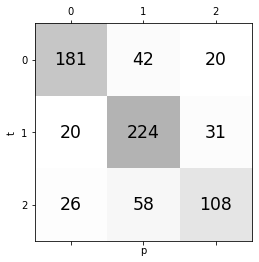

accuracy    0.7225352112676057
precision   0.7226533786346861
recall      0.707300473874548


In [12]:
p = qda.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — QDA<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .72253521 .72265337 .70730047  181 224 108
en_core_web_lg   .72380952 .71994379 .70806959  175 189  92  without outliers (pm=LOF)
en_core_web_lg   .72149122 .71151823 .69240557  110 162  57  without outliers (pm=IF)

en_core_web_trf  .47390691 .35185723 .44113121  103 233   0
en_core_web_trf  .52348993 .35826616 .44445787   86 226   0  without outliers (pm=LOF)
en_core_web_trf  .55279503 .39885185 .46371570   49 129   0  without outliers (pm=IF)

</pre>

<br>